<a href="https://colab.research.google.com/github/TanmaySafal04/Lenet_Architecture/blob/main/LENET_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
from tensorflow.python.ops.gen_nn_ops import Conv2D
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns

from tensorflow import keras
from keras import layers
from keras import Sequential
from keras.layers import Dense,Conv2D,AveragePooling2D,Flatten

In [76]:
# Loading the mnist dataset
mnist=tf.keras.datasets.mnist


In [77]:
# Splitting into train and test
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [78]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [79]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

<Axes: >

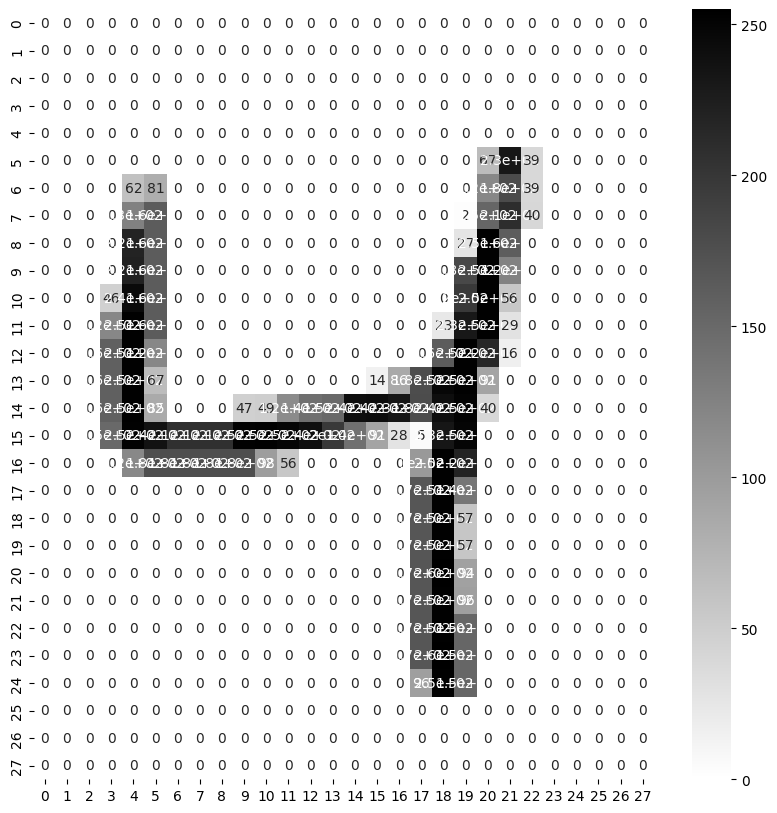

In [80]:
plt.figure(figsize=(10,10))
sns.heatmap(x_train[2],annot=True,cmap="binary")

In [81]:
y_train[2]

4

In [82]:
len(x_train)

60000

In [83]:
len(x_test)

10000

In [84]:
len(y_train)

60000

In [85]:
len(y_test)

10000

In [86]:
# scaling the input data of training and testing
x_train = x_train/255
x_test = x_test/255



<Axes: >

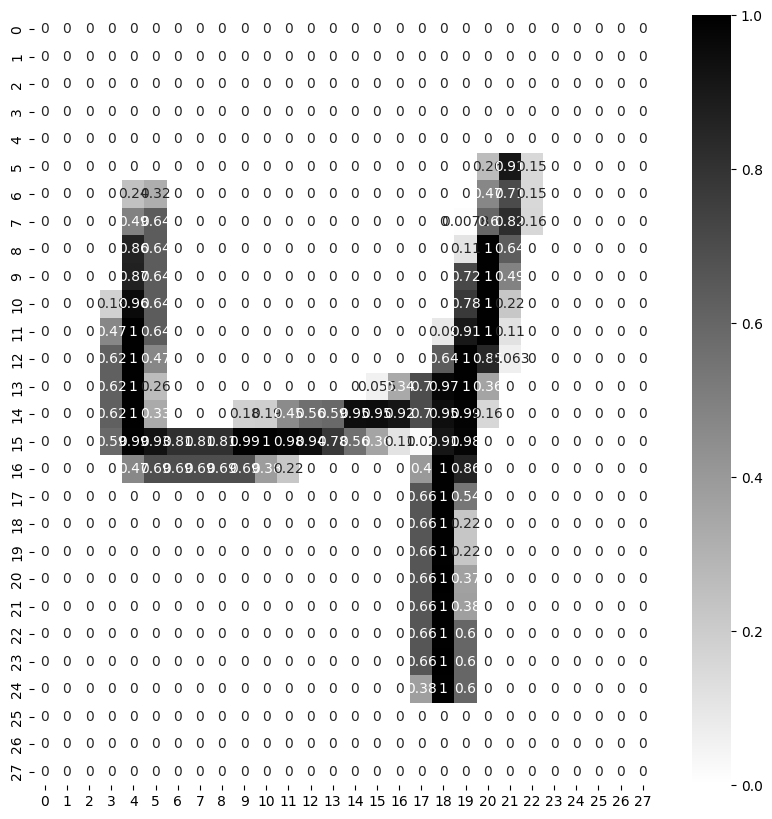

In [87]:
plt.figure(figsize=(10,10))
sns.heatmap(x_train[2],annot=True,cmap="binary")

In [88]:
model = Sequential()

**https://medium.com/analytics-vidhya/lenet-architecture-document-recognition-ed971ab2a23f**

In [89]:

#1st Convolution layer
model.add(Conv2D(6, kernel_size=(5,5), strides=(1,1), activation='tanh', padding='valid', input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))

#2nd Convolution layer
model.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), activation='tanh', padding='valid'))
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))

# Covert data to 1-D
model.add(Flatten())

#Hidden layers
model.add(Dense(120,activation='tanh'))
model.add(Dense(84,activation='tanh'))

# Output layer
model.add(Dense(10,activation='softmax'))

In [90]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_12 (Aver  (None, 12, 12, 6)         0         
 agePooling2D)                                                   
                                                                 
 conv2d_17 (Conv2D)          (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_13 (Aver  (None, 4, 4, 16)          0         
 agePooling2D)                                                   
                                                                 
 flatten_6 (Flatten)         (None, 256)               0         
                                                                 
 dense_18 (Dense)            (None, 120)              

In [91]:
# Reshaping the input data
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2],1)

x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)

In [92]:
x_train.shape

(60000, 28, 28, 1)

In [93]:
x_test.shape

(10000, 28, 28, 1)

In [94]:
y_train.shape

(60000,)

In [95]:
y_test.shape

(10000,)

In [96]:
# Uses one hot encoding to convert our data to desired output format. Eg 4 will become [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test  = tf.keras.utils.to_categorical(y_test,10)

In [97]:
y_train.shape

(60000, 10)

In [98]:
y_test.shape

(10000, 10)

In [99]:
y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [100]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [101]:
model.fit(x_train,y_train,
                    epochs=10,batch_size=128)

Epoch 1/10
469/469 [==============================] - 29s 59ms/step - loss: 0.3517 - accuracy: 0.8993
Epoch 2/10
469/469 [==============================] - 22s 46ms/step - loss: 0.1242 - accuracy: 0.9632
Epoch 3/10
469/469 [==============================] - 24s 51ms/step - loss: 0.0826 - accuracy: 0.9747
Epoch 4/10
469/469 [==============================] - 22s 46ms/step - loss: 0.0625 - accuracy: 0.9803
Epoch 5/10
469/469 [==============================] - 24s 51ms/step - loss: 0.0510 - accuracy: 0.9841
Epoch 6/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0423 - accuracy: 0.9872
Epoch 7/10
469/469 [==============================] - 24s 51ms/step - loss: 0.0381 - accuracy: 0.9877
Epoch 8/10
469/469 [==============================] - 22s 48ms/step - loss: 0.0317 - accuracy: 0.9904
Epoch 9/10
469/469 [==============================] - 26s 54ms/step - loss: 0.0283 - accuracy: 0.9910
Epoch 10/10
469/469 [==============================] - 24s 51ms/step - loss: 0.022

In [102]:
loss , acc = model.evaluate(x_test,y_test)
print('Accuracy :',acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0459 - accuracy: 0.9860
Accuracy : 0.9860000014305115


In [103]:
!pip install visualkeras


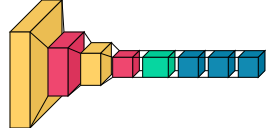

In [104]:
import visualkeras
visualkeras.layered_view(model)